# CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [2]:

# Charger le dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prétraitement des données
# Normaliser les images
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255


# Convertir les labels en format catégorique
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
# Construire le modèle CNN
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Définir l'entrée du modèle
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.8490 - loss: 0.4866 - val_accuracy: 0.9843 - val_loss: 0.0584
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 60ms/step - accuracy: 0.9805 - loss: 0.0639 - val_accuracy: 0.9855 - val_loss: 0.0458
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9869 - loss: 0.0415 - val_accuracy: 0.9863 - val_loss: 0.0498
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9897 - loss: 0.0345 - val_accuracy: 0.9898 - val_loss: 0.0354
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accuracy: 0.9865 - val_loss: 0.0458


In [6]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9848 - loss: 0.0541
Test Accuracy: 0.987500011920929


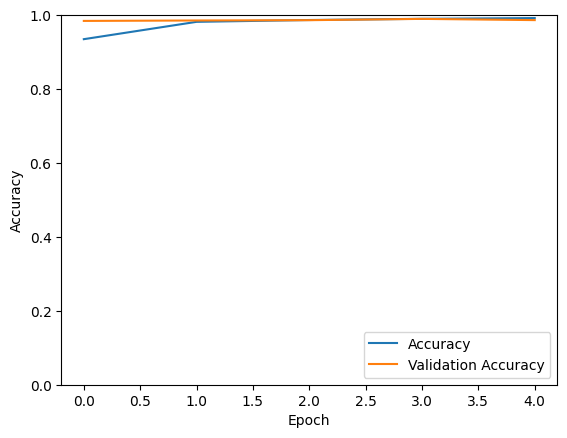

In [7]:
# Optionnel : Visualiser la courbe de perte et la précision pendant l'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [8]:
import random
import numpy as np
# Générer un indice aléatoire pour sélectionner une image de test
idx_test = random.randint(0, x_test.shape[0]-1)
img_test = x_test[idx_test]
img_test = np.expand_dims(img_test, axis=0)
prediction = model.predict(img_test)
predict_label = np.argmax(prediction)
true_label = y_test[idx_test]
print(f'The predicted label is {predict_label} and the true label is {np.argmax(true_label)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
The predicted label is 4 and the true label is 4


In [9]:
print(prediction)
true_label

[[3.2142340e-09 9.8516928e-09 1.3753824e-04 7.0942650e-07 9.9977559e-01
  1.2806451e-09 1.2006644e-08 8.3767794e-05 4.6995225e-08 2.3909145e-06]]


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])